## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

identify factors that contribute to the death rate of cancer patients

### b) Defining the Metric for Success

The model used should be reasonably accurate

### c) Understanding the Context 

The African Cancer Institute at Stellenbosch University aims to contribute to improving cancer prevention (both primary and secondary prevention, including screening), diagnosis and management in Africa. The institute is a coordinating and directive institution for research and training in the field of cancer within the University

### d) Recording the Experimental Design

What are the steps you are going to take to solve/answer this problem/question?

### e) Data Relevance

Is the data provided relevant to solving/answering this problem/question?

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load and preview dataset
cancer = pd.read_csv('cancer_reg (1).csv')
cancer.sample(3)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2158,76.0,32,202.5,490.6,38544,12007,19.9,0.000000,"(37413.8, 40362.7]",42.5,41.3,43.7,"Edmonson County, Kentucky",56.6,19.8,39.0,31.7,9.5,42.1,8.7,47.3,8.9,63.0,NaN,44.3,40.2,22.7,97.240810,1.470467,0.132177,0.000000,58.682121,2.563122
1891,18.0,11,179.0,297.2,39335,3549,21.0,0.000000,"(37413.8, 40362.7]",44.9,40.8,47.3,"Kinney County, Texas",56.7,24.9,38.1,NaN,2.4,27.9,11.1,41.3,13.2,52.7,39.4,29.6,33.9,16.3,97.959184,1.202125,0.000000,0.111826,55.699722,0.000000
1861,314.0,129,176.3,429.7,48461,66746,17.1,344.589938,"(48021.6, 51046.4]",37.5,36.3,38.9,"Harrison County, Texas",53.3,12.5,34.5,NaN,4.3,34.0,14.0,55.6,7.7,60.7,47.8,43.4,31.5,17.9,72.927112,21.664634,0.525468,2.773386,56.073218,5.790913


In [ ]:
# load glossary
glossary = pd.read_csv('regression_project_glossary.csv',header = None)
glossary

,0
0,"avganncount, decimal, Mean number of reported cases of cancer diagnosed annually (a)"
1,"avgdeathsperyear, integer, Mean number of reported mortalities due to cancer (a)"
2,"target_deathrate, decimal, Dependent variable. Mean per capita (100,000) cancer mortalities (a)"
3,"incidencerate, decimal, Mean per capita (100,000) cancer diagnoses (a)"
4,"medincome, integer, Median income per county (b)"
5,"popest2015, integer, Population of county (b)"
6,"povertypercent, decimal, Percent of populace in poverty (b)"
7,"studypercap, decimal, Per capita number of cancer-related clinical trials per county (a)"
8,"binnedinc, string, Median income per capita binned by decile (b)"
9,"medianage, decimal, Median age of county residents (b)"


In [ ]:
# check dataset shape
cancer.shape

(3047, 33)

In [ ]:
# preview variable datatypes
cancer.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [ ]:
# check for duplicates
cancer.duplicated().sum()

0

In [ ]:
# check for missing values
cancer.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

Which variables contain missing data?

In [ ]:
# calculate the percentage of missing data for each variable

cancer.isna().mean().round(4) * 100


avganncount                 0.00
avgdeathsperyear            0.00
target_deathrate            0.00
incidencerate               0.00
medincome                   0.00
popest2015                  0.00
povertypercent              0.00
studypercap                 0.00
binnedinc                   0.00
medianage                   0.00
medianagemale               0.00
medianagefemale             0.00
geography                   0.00
percentmarried              0.00
pctnohs18_24                0.00
pcths18_24                  0.00
pctsomecol18_24            74.99
pctbachdeg18_24             0.00
pcths25_over                0.00
pctbachdeg25_over           0.00
pctemployed16_over          4.99
pctunemployed16_over        0.00
pctprivatecoverage          0.00
pctprivatecoveragealone    19.99
pctempprivcoverage          0.00
pctpubliccoverage           0.00
pctpubliccoveragealone      0.00
pctwhite                    0.00
pctblack                    0.00
pctasian                    0.00
pctotherra

A rule of thumb is to drop any variable which has more than 5-10% of its data missing.

In [ ]:
# drop the variables exceeding this limit and impute the remaining ones with the median.

cancer.drop(['pctsomecol18_24','pctprivatecoveragealone'],axis=1,inplace=True)

In [ ]:
cancer['pctemployed16_over'].fillna(value=cancer['pctemployed16_over'].mean(),inplace=True)

In [ ]:
cancer.isna().sum()

avganncount               0
avgdeathsperyear          0
target_deathrate          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
binnedinc                 0
medianage                 0
medianagemale             0
medianagefemale           0
geography                 0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

In [ ]:
# save the data set to a clean CSV file

cancer.to_csv('clean_cancer.csv')

In [ ]:
# loading the clean dataset

clean_cancer = pd.read_csv('clean_cancer.csv')

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Test for Multicollinearity

Since our dataset consists of largely numerical variables, we will look at the correlations between our variables so we can look at multicollinearity.

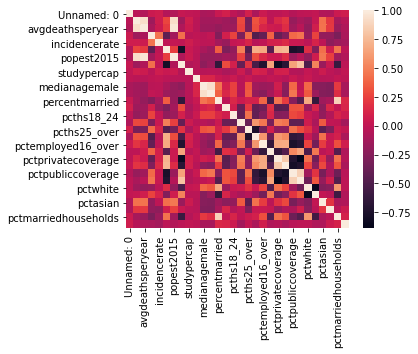

In [ ]:
# checking the correlations between the numerical variables
clean_cancer_corr = clean_cancer.corr()

# plotting the correlations onto a heatmap
plt.figure(figsize=(5,4))

sns.heatmap(clean_cancer_corr)
plt.show()

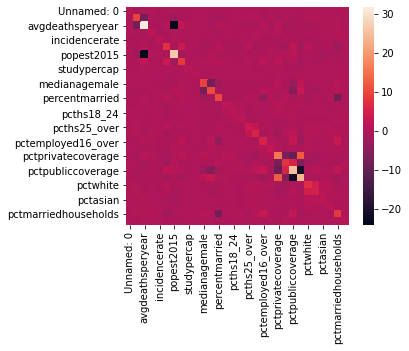

In [ ]:
# create a dataframe showing the VIF scores of the above correlations
VIF = pd.DataFrame(np.linalg.inv(clean_cancer_corr.values), index = clean_cancer_corr.index, columns=clean_cancer_corr.columns)
# plot the heatmap
plt.figure(figsize=(5,4))

sns.heatmap(VIF)
plt.show()


A VIF score of 5 and higher indicates that that particular variable has relatively high multicollinearity with one or more variables in the dataset, and that variable needs to be removed to carry out regression. Since having little or no multicollinearity is one of the assumptions of linear regression, of which we will do multiple linear regression, we should create a dataset with little to no multicollinearity.

In [ ]:
pd.DataFrame(np.diag(VIF), index=[VIF.index, VIF.columns])

,,0
Unnamed: 0,Unnamed: 0,1.095461
avganncount,avganncount,9.914889
avgdeathsperyear,avgdeathsperyear,31.679254
target_deathrate,target_deathrate,2.097608
incidencerate,incidencerate,1.572394
medincome,medincome,7.623861
popest2015,popest2015,26.501829
povertypercent,povertypercent,8.734950
studypercap,studypercap,1.047032
medianage,medianage,1.024255


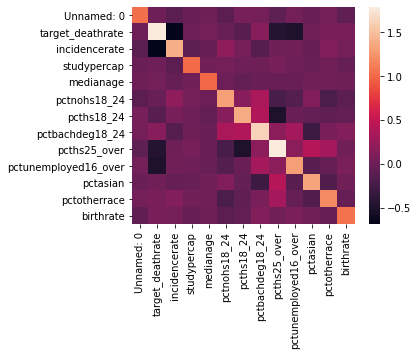

In [ ]:
# drop the variables with VIF scores higher than 5
clean_cancer.drop(['avganncount','avgdeathsperyear','medincome','popest2015','povertypercent','medianagemale','medianagefemale','percentmarried','pctbachdeg25_over','pctemployed16_over','pctprivatecoverage','pctempprivcoverage','pctpubliccoverage','pctpubliccoveragealone','pctwhite','pctblack','pctmarriedhouseholds'],axis=1,inplace=True)

# calculate the correlations of the new dataset
clean_cancer_corr_new = clean_cancer.corr()

# get the VIF score
VIF_new = pd.DataFrame(np.linalg.inv(clean_cancer_corr_new.values), index = clean_cancer_corr_new.index, columns=clean_cancer_corr_new.columns)

# plot the VIF score
plt.figure(figsize=(5,4))

sns.heatmap(VIF_new)
plt.show()

In [ ]:
# checking the data types
clean_cancer.dtypes

Unnamed: 0                int64
target_deathrate        float64
incidencerate           float64
studypercap             float64
binnedinc                object
medianage               float64
geography                object
pctnohs18_24            float64
pcths18_24              float64
pctbachdeg18_24         float64
pcths25_over            float64
pctunemployed16_over    float64
pctasian                float64
pctotherrace            float64
birthrate               float64
dtype: object

In [ ]:
# removing non-numerical variables
clean_cancer.drop(['binnedinc','geography',],axis=1,inplace=True)

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# dividing our dataset into features (X) and target (y)
X = clean_cancer.iloc[:, :-1].values
y = clean_cancer.iloc[:, 1].values

In [ ]:
# splitting into train and test sets 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# importing our Linear Regression function
from sklearn.linear_model import LinearRegression

# instantiating our regressor
regressor = LinearRegression()

In [ ]:
# fitting our regressor to our training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# making predictions on the test set of our independent variables
y_pred = regressor.predict(X_test)

In [ ]:
# comparing the actual output values with the predicted values
compare = pd.DataFrame({
    'Actual' : y_test, 
    'Predicted' : y_pred
})

# previewing 10 samples
compare.sample(10)

,Actual,Predicted
214,181.7,181.7
381,179.4,179.4
372,177.8,177.8
106,159.5,159.5
544,164.6,164.6
593,182.3,182.3
540,161.2,161.2
358,132.8,132.8
239,198.7,198.7
502,215.6,215.6


In [ ]:
# evaluating model performance using Root Mean Squared Error (RMSE)
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.015293097471463e-12


In [ ]:
print("10% of target death rate mean:", cancer.target_deathrate.mean() * 0.1)

10% of target death rate mean: 17.866406301279973


What have you noticed about the RMSE score and 10% of the target death rate mean?

In [ ]:
print('R-squared:', metrics.r2_score(y_test, y_pred))

R-squared: 1.0


What does the R-squared value tell you?

### 4.1 Residual Plots & Heteroscedasticity

In [ ]:
residuals = y_test - y_pred
residuals

array([ 3.12638804e-13,  3.41060513e-13,  3.41060513e-13, -1.70530257e-13,
        3.69482223e-13,  3.12638804e-13,  3.12638804e-13, -2.78532752e-12,
       -3.18323146e-12, -8.24229573e-13,  3.41060513e-13,  2.84217094e-13,
        3.12638804e-13,  3.69482223e-13, -1.44950718e-12,  3.12638804e-13,
        2.55795385e-13,  3.97903932e-13,  3.12638804e-13,  3.69482223e-13,
        3.12638804e-13,  2.84217094e-13,  3.41060513e-13,  3.69482223e-13,
        3.69482223e-13,  0.00000000e+00,  3.41060513e-13,  5.68434189e-14,
       -8.24229573e-13,  1.42108547e-13, -4.46220838e-12,  2.98427949e-13,
       -6.25277607e-13,  3.41060513e-13,  2.70006240e-13,  3.97903932e-13,
        5.68434189e-14,  3.12638804e-13,  3.41060513e-13,  3.41060513e-13,
       -1.36424205e-12,  2.84217094e-13,  2.27373675e-13,  3.41060513e-13,
        3.12638804e-13,  2.84217094e-13,  3.69482223e-13,  3.97903932e-13,
        3.41060513e-13,  3.41060513e-13,  3.69482223e-13,  3.41060513e-13,
        3.41060513e-13,  

In [ ]:
# create residuals by substracting the test value from the predicted value for each row in our dataset
residuals = y_test - y_pred

# converting the residuals array into a dataframe
residuals_df = pd.DataFrame(residuals)

# previewing the summary statistics
residuals_df.describe()

,0
count,6.100000e+02
mean,-3.075136e-15
std,1.016122e-12
min,-8.753887e-12
25%,1.705303e-13
50%,3.126388e-13
75%,3.694822e-13
max,5.684342e-13


We will plot our residuals on a scatter plot. If the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

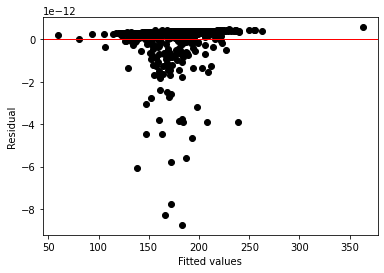

In [ ]:
# plotting our residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth = 1)
plt.show()

We see that a lot of values are scattered around the mean while a fairly large amount are spread further apart from the mean, meaning that there are no obvious patterns. We will go ahead and perform a test for heteroscedasticity to be certain. We will use Bartlett's Test to test the null hypothesis that the variances in this dataset are homogeneous (equal).

In [ ]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# print the critical value
print("Critical value:", critical_value)

Critical value: inf


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [ ]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


## <font color='#2F4F4F'>5. Summary of Findings</font>

What have you concluded from your analysis?

## <font color='#2F4F4F'>6. Recommendations</font>

What do you recommend the company do?

## <font color='#2F4F4F'>7. Challenging your Solution</font>

What can you do to make this better?